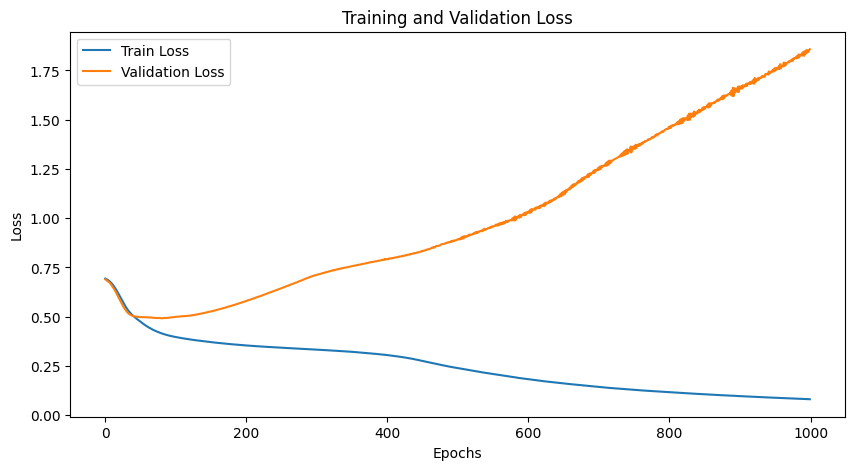

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import os
# Load saved data
output_dir = './'

train_losses = np.load(os.path.join(output_dir, 'train_losses.npy'))
val_losses = np.load(os.path.join(output_dir, 'val_losses.npy'))
train_f1_scores = np.load(os.path.join(output_dir, 'train_f1_scores.npy'))
val_f1_scores = np.load(os.path.join(output_dir, 'val_f1_scores.npy'))
train_conf_matrices = np.load(os.path.join(output_dir, 'train_conf_matrices.npy'), allow_pickle=True)
val_conf_matrices = np.load(os.path.join(output_dir, 'val_conf_matrices.npy'), allow_pickle=True)

# Plot training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [3]:
def calculate_precision_recall(confusion_matrix):
    # 计算真正例（True Positive）
    tp = confusion_matrix[1][1]
    # 计算假正例（False Positive）
    fp = confusion_matrix[0][1]
    # 计算假负例（False Negative）
    fn = confusion_matrix[1][0]
    # 计算准确率（Precision）
    precision = tp / (tp + fp)
    # 计算召回率（Recall）
    recall = tp / (tp + fn)
    return precision, recall

precision, recall = calculate_precision_recall(val_conf_matrices[800])
print(val_conf_matrices[-1])
print(f'类别1的准确率为: {precision:.4f}')
print(f'类别1的召回率为: {recall:.4f}')

[[363  38]
 [ 10  14]]
类别1的准确率为: 0.2745
类别1的召回率为: 0.5833


/tmp/ipykernel_3516631/3157064770.py:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


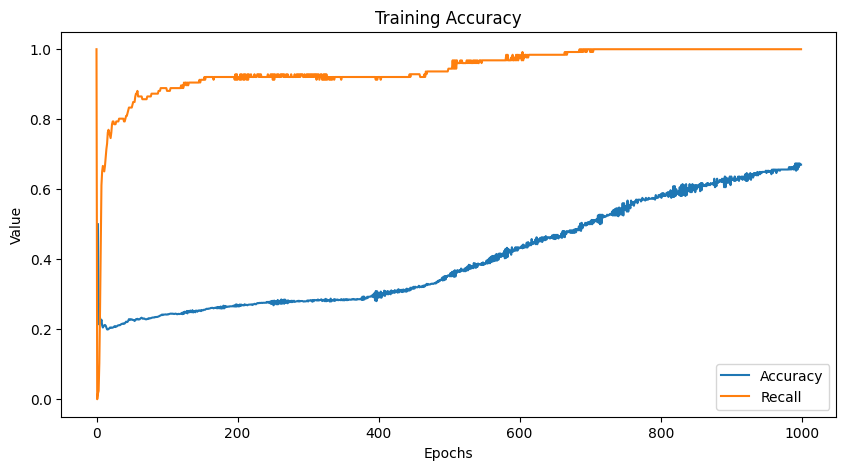

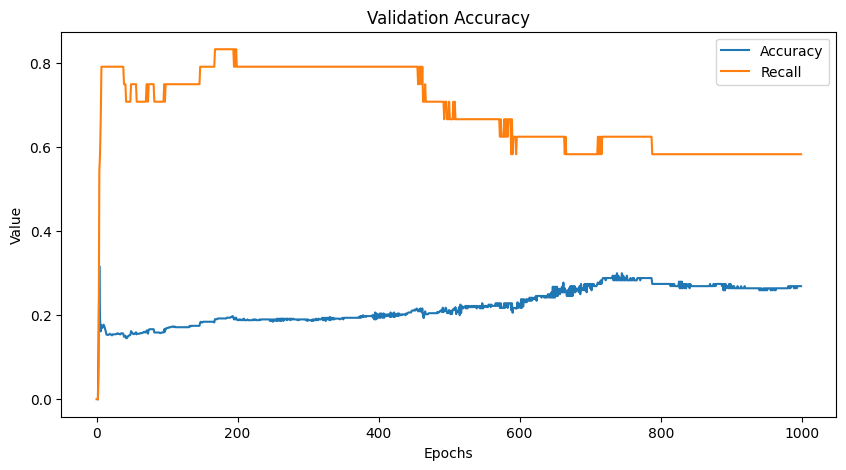

In [23]:
# Plot training and validation accuracy curves using confusion matrices
def plot_accuracy_curve(conf_matrices, title):
    accuracies = [calculate_precision_recall(x)[0] for x in conf_matrices]
    recall = [calculate_precision_recall(x)[1] for x in conf_matrices]
    
    plt.figure(figsize=(10, 5))
    plt.plot(accuracies, label='Accuracy')
    plt.plot(recall, label='Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot accuracy curves for training and validation
plot_accuracy_curve(train_conf_matrices, 'Training Accuracy')
plot_accuracy_curve(val_conf_matrices, 'Validation Accuracy')